In [46]:
# IMPORT LIBRARY
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score ,precision_score,recall_score,f1_score, ConfusionMatrixDisplay, matthews_corrcoef

### Preprocessing

In [47]:
# Import Dataset
df=pd.read_excel('dataLymphatics.xlsx')
df.columns = df.columns.str.strip().str.replace('-', '_')
df.head()
df.shape

(148, 19)

In [48]:
# Informasi data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            148 non-null    int64
 1   lymphatics       148 non-null    int64
 2   block_of_affere  148 non-null    int64
 3   bl._of_lymph._c  148 non-null    int64
 4   bl._of_lymph._s  148 non-null    int64
 5   by_pass          148 non-null    int64
 6   extravates       148 non-null    int64
 7   regeneration_of  148 non-null    int64
 8   early_uptake_in  148 non-null    int64
 9   lym.nodes_dimin  148 non-null    int64
 10  lym.nodes_enlar  148 non-null    int64
 11  changes_in_lym   148 non-null    int64
 12  defect_in_node   148 non-null    int64
 13  changes_in_node  148 non-null    int64
 14  changes_in_stru  148 non-null    int64
 15  special_forms    148 non-null    int64
 16  dislocation_of   148 non-null    int64
 17  exclusion_of_no  148 non-null    int64
 18  no._of_nod

In [49]:
# Ringkasan Data
df.describe()

,class,lymphatics,block_of_affere,bl._of_lymph._c,bl._of_lymph._s,by_pass,extravates,regeneration_of,early_uptake_in,lym.nodes_dimin,lym.nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no._of_nodes_in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [50]:
# Deteksi Missing Value
df.isna().sum()

class              0
lymphatics         0
block_of_affere    0
bl._of_lymph._c    0
bl._of_lymph._s    0
by_pass            0
extravates         0
regeneration_of    0
early_uptake_in    0
lym.nodes_dimin    0
lym.nodes_enlar    0
changes_in_lym     0
defect_in_node     0
changes_in_node    0
changes_in_stru    0
special_forms      0
dislocation_of     0
exclusion_of_no    0
no._of_nodes_in    0
dtype: int64

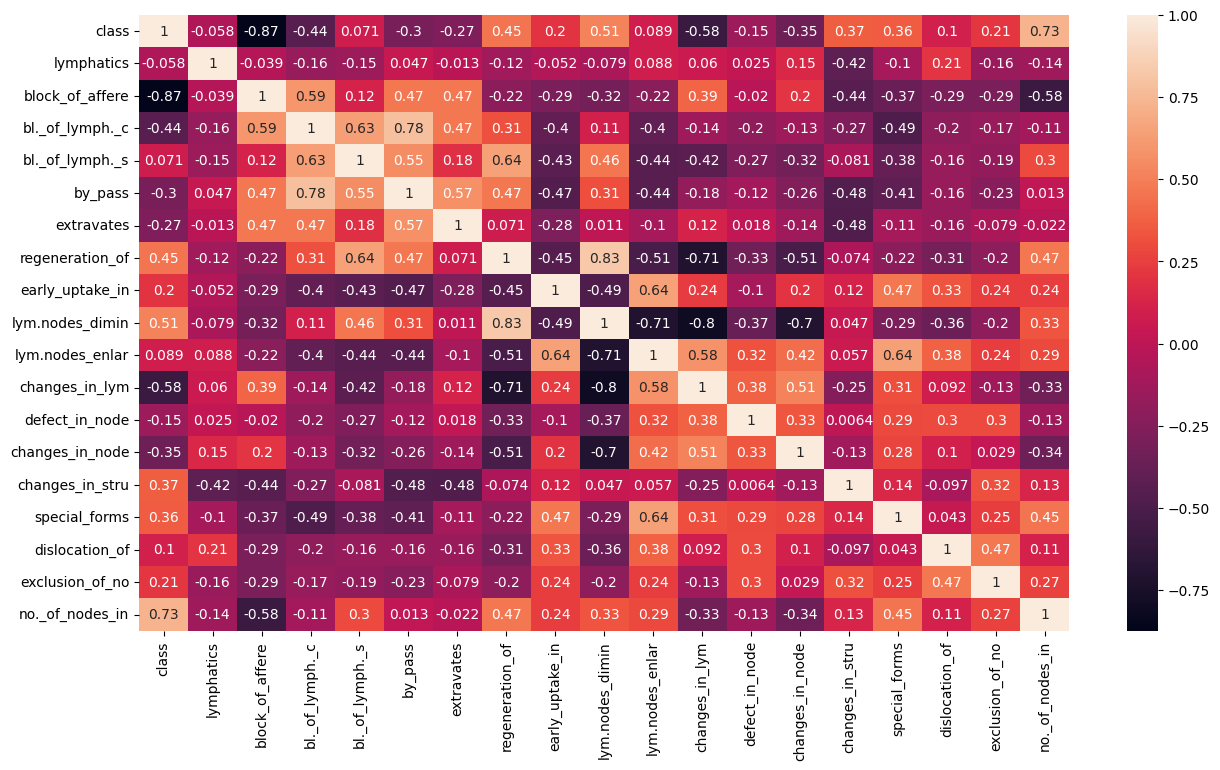

In [51]:
# Korelasi tiap atribut
df.corr()
# Visualisasi dengan HeatMap 
dfHeat = df
dfHeat = dfHeat.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(dfHeat.corr(), annot=True)
plt.show()

In [52]:
# #Normalize
# from sklearn.preprocessing import MinMaxScaler
# minmax = MinMaxScaler()
# df.iloc[0:, 0:18] = minmax.fit_transform(df.iloc[0:,0:18])
# df.head(5)

### Variabel dependent dan independent

In [53]:
# Data Training
X= [13, 2, 15, 14, 10, 11]
X=df.loc[:, df.columns[X]]
X.head()

,changes_in_node,block_of_affere,special_forms,changes_in_stru,lym.nodes_enlar,changes_in_lym
0,4,2,1,8,2,2
1,3,2,2,4,3,3
2,4,2,3,8,4,3
3,4,1,3,4,3,3
4,3,1,1,5,2,2


In [54]:
# Data Testing
y= [0]
y=df.loc[:, df.columns[y]]
y.head()

,class
0,3
1,2
2,3
3,3
4,2


In [55]:
#train test split (30) test_size = 0.2
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, random_state= 42, test_size=0.2, stratify = y)

#train test split (10) test_size = 0.3
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, random_state= 42, test_size=0.3, stratify = y)

#train test split (10) test_size = 0.4
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X, y, random_state= 42, test_size=0.4, stratify = y)

TRAIN 80, TESTING 20

In [56]:
#Random Forest Model n_estimator 100, max_depth 5
rf_20 = RandomForestClassifier( n_estimators=100, max_depth=5, random_state=42)
rf_20.fit(X_train_20, y_train_20)
y_predRF_20 =rf_20.predict(X_test_20)

print("======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:100  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_20, y_predRF_20)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_20, y_predRF_20, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_20, y_predRF_20, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_20, y_predRF_20, average='macro')*100))

#Random Forest Model n_estimator 100, max_depth 25
rf_20_100_25 = RandomForestClassifier( n_estimators=100, max_depth=25, random_state=42)
rf_20_100_25.fit(X_train_20, y_train_20)
y_predRF_20_100_25 =rf_20_100_25.predict(X_test_20)

print("======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:100  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_20, y_predRF_20_100_25)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_20, y_predRF_20_100_25, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_20, y_predRF_20_100_25, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_20, y_predRF_20_100_25, average='macro')*100))

#Random Forest Model n_estimator 100, max_depth 40
rf_20_100_40 = RandomForestClassifier( n_estimators=100, max_depth=40, random_state=42)
rf_20_100_40.fit(X_train_20, y_train_20)
y_predRF_20_100_40 =rf_20_100_40.predict(X_test_20)

print("======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:100  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_20, y_predRF_20_100_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_20, y_predRF_20_100_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_20, y_predRF_20_100_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_20, y_predRF_20_100_40, average='macro')*100))

C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\2171817621.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_20.fit(X_train_20, y_train_20)
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\2171817621.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_20_100_25.fit(X_train_20, y_train_20)


======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:100  ======
ACCURACY: 76.67%
RECALL: 51.63%
F1-SCORE: 51.27%
PRECISION: 51.67%


======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:100  ======
ACCURACY: 80.00%
RECALL: 53.59%
F1-SCORE: 53.47%
PRECISION: 55.03%


======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:100  ======
ACCURACY: 80.00%
RECALL: 53.59%
F1-SCORE: 53.47%
PRECISION: 55.03%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\2171817621.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_20_100_40.fit(X_train_20, y_train_20)
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
#Random Forest Model n_estimator 200, max_depth 5
rf_20_200 = RandomForestClassifier( n_estimators=200, max_depth=5, random_state=42)
rf_20_200.fit(X_train_20, y_train_20)
y_predRF_20 =rf_20_200.predict(X_test_20)

print("======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:200  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_20, y_predRF_20)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_20, y_predRF_20, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_20, y_predRF_20, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_20, y_predRF_20, average='macro')*100))

#Random Forest Model n_estimator 200, max_depth 25
rf_20_200_25 = RandomForestClassifier( n_estimators=200, max_depth=25, random_state=42)
rf_20_200_25.fit(X_train_20, y_train_20)
y_predRF_20_200_25 =rf_20_200_25.predict(X_test_20)

print("======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:200  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_20, y_predRF_20_200_25)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_20, y_predRF_20_200_25, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_20, y_predRF_20_200_25, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_20, y_predRF_20_200_25, average='macro')*100))

#Random Forest Model n_estimator 200, max_depth 40
rf_20_200_40 = RandomForestClassifier( n_estimators=200, max_depth=40, random_state=42)
rf_20_200_40.fit(X_train_20, y_train_20)
y_predRF_20_200_40 =rf_20_200_40.predict(X_test_20)

print("======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:200  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_20, y_predRF_20_200_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_20, y_predRF_20_200_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_20, y_predRF_20_200_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_20, y_predRF_20_200_40, average='macro')*100))

C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\2672457680.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_20_200.fit(X_train_20, y_train_20)


======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:200  ======
ACCURACY: 76.67%
RECALL: 51.63%
F1-SCORE: 51.27%
PRECISION: 51.67%


======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:200  ======
ACCURACY: 80.00%
RECALL: 53.59%
F1-SCORE: 53.47%
PRECISION: 55.03%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\2672457680.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_20_200_25.fit(X_train_20, y_train_20)
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\2672457680.py:25: Da

======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:200  ======
ACCURACY: 80.00%
RECALL: 53.59%
F1-SCORE: 53.47%
PRECISION: 55.03%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
#Random Forest Model n_estimator 300, max_depth 5
rf_20_300 = RandomForestClassifier( n_estimators=300, max_depth=5, random_state=42)
rf_20_300.fit(X_train_20, y_train_20)
y_predRF_20 =rf_20_300.predict(X_test_20)

print("======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:300  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_20, y_predRF_20)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_20, y_predRF_20, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_20, y_predRF_20, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_20, y_predRF_20, average='macro')*100))

#Random Forest Model n_estimator 300, max_depth 25
rf_20_300_25 = RandomForestClassifier( n_estimators=300, max_depth=25, random_state=42)
rf_20_300_25.fit(X_train_20, y_train_20)
y_predRF_20_300_25 =rf_20_300_25.predict(X_test_20)

print("======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:300  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_20, y_predRF_20_300_25)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_20, y_predRF_20_300_25, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_20, y_predRF_20_300_25, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_20, y_predRF_20_300_25, average='macro')*100))

#Random Forest Model n_estimator 300, max_depth 40
rf_20_300_40 = RandomForestClassifier( n_estimators=300, max_depth=40, random_state=42)
rf_20_300_40.fit(X_train_20, y_train_20)
y_predRF_20_300_40 =rf_20_300_40.predict(X_test_20)

print("======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:300  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_20, y_predRF_20_300_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_20, y_predRF_20_300_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_20, y_predRF_20_300_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_20, y_predRF_20_300_40, average='macro')*100))

C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\1418892888.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_20_300.fit(X_train_20, y_train_20)


======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:300  ======
ACCURACY: 80.00%
RECALL: 53.59%
F1-SCORE: 53.47%
PRECISION: 55.03%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\1418892888.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_20_300_25.fit(X_train_20, y_train_20)


======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:300  ======
ACCURACY: 80.00%
RECALL: 53.59%
F1-SCORE: 53.47%
PRECISION: 55.03%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\1418892888.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_20_300_40.fit(X_train_20, y_train_20)


======  CLASSIFICATION RANDOM FOREST 80%DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:300  ======
ACCURACY: 80.00%
RECALL: 53.59%
F1-SCORE: 53.47%
PRECISION: 55.03%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN 70, TESTING 30

In [59]:
#Random Forest Model n_estimator 100, max_depth 5
rf_30 = RandomForestClassifier( n_estimators=100, max_depth=5, random_state=42)
rf_30.fit(X_train_30, y_train_30)
y_predRF_30 =rf_30.predict(X_test_30)

print("======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:100  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_30, y_predRF_30)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_30, y_predRF_30, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_30, y_predRF_30, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_30, y_predRF_30, average='macro')*100))

#Random Forest Model n_estimator 100, max_depth 25
rf_30_100_25 = RandomForestClassifier( n_estimators=100, max_depth=25, random_state=42)
rf_30_100_25.fit(X_train_30, y_train_30)
y_predRF_30_100_25 =rf_30_100_25.predict(X_test_30)

print("======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:100  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_30, y_predRF_30_100_25)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_30, y_predRF_30_100_25, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_30, y_predRF_30_100_25, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_30, y_predRF_30_100_25, average='macro')*100))

#Random Forest Model n_estimator 100, max_depth 40
rf_30_100_40 = RandomForestClassifier( n_estimators=100, max_depth=40,random_state=42)
rf_30_100_40.fit(X_train_30, y_train_30)
y_predRF_30_100_40 =rf_30_100_40.predict(X_test_30)

print("======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:100  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_30, y_predRF_30_100_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_30, y_predRF_30_100_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_30, y_predRF_30_100_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_30, y_predRF_30_100_40, average='macro')*100))

======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:100  ======
ACCURACY: 82.22%
RECALL: 42.06%
F1-SCORE: 41.74%
PRECISION: 42.57%




C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\3638658977.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_30.fit(X_train_30, y_train_30)
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\3638658977.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_30_100_25.fit(X_train_30, y_train_30)


======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:100  ======
ACCURACY: 82.22%
RECALL: 42.06%
F1-SCORE: 41.74%
PRECISION: 42.57%


======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:100  ======
ACCURACY: 82.22%
RECALL: 42.06%
F1-SCORE: 41.74%
PRECISION: 42.57%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\3638658977.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_30_100_40.fit(X_train_30, y_train_30)
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#Random Forest Model n_estimator 200, max_depth 5
rf_30_200 = RandomForestClassifier( n_estimators=200, max_depth=5, random_state=42)
rf_30_200.fit(X_train_30, y_train_30)
y_predRF_30 =rf_30_200.predict(X_test_30)

#Random Forest Model n_estimator 200, max_depth 25
rf_30_200_25 = RandomForestClassifier( n_estimators=200, max_depth=25, random_state=42)
rf_30_200_25.fit(X_train_30, y_train_30)
y_predRF_30_200_25 =rf_30_200_25.predict(X_test_30)

#Random Forest Model n_estimator 200, max_depth 40
rf_30_200_40 = RandomForestClassifier( n_estimators=200, max_depth=40,random_state=42)
rf_30_200_40.fit(X_train_30, y_train_30)
y_predRF_30_200_40 =rf_30_200_40.predict(X_test_30)

print("======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:200  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_30, y_predRF_30)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_30, y_predRF_30, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_30, y_predRF_30, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_30, y_predRF_30, average='macro')*100))

print("======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:200  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_30, y_predRF_30_200_25)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_30, y_predRF_30_200_25, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_30, y_predRF_30_200_25, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_30, y_predRF_30_200_25, average='macro')*100))

print("======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:200  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_30, y_predRF_30_200_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_30, y_predRF_30_200_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_30, y_predRF_30_200_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_30, y_predRF_30_200_40, average='macro')*100))

C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\701791757.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_30_200.fit(X_train_30, y_train_30)
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\701791757.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_30_200_25.fit(X_train_30, y_train_30)
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\701791757.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_30_200_40.fit(X_train_30, y_train_30)


======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:200  ======
ACCURACY: 82.22%
RECALL: 42.06%
F1-SCORE: 41.74%
PRECISION: 42.57%


======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:200  ======
ACCURACY: 82.22%
RECALL: 42.06%
F1-SCORE: 41.74%
PRECISION: 42.57%


======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:200  ======
ACCURACY: 82.22%
RECALL: 42.06%
F1-SCORE: 41.74%
PRECISION: 42.57%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
#Random Forest Model n_estimator 300, max_depth 5
rf_30_300 = RandomForestClassifier( n_estimators=300, max_depth=5, random_state=42)
rf_30_300.fit(X_train_30, y_train_30)
y_predRF_30 =rf_30_300.predict(X_test_30)

#Random Forest Model n_estimator 300, max_depth 25
rf_30_300_25 = RandomForestClassifier( n_estimators=300, max_depth=25, random_state=42)
rf_30_300_25.fit(X_train_30, y_train_30)
y_predRF_30_300_25 =rf_30_300_25.predict(X_test_30)

#Random Forest Model n_estimator 300, max_depth 40
rf_30_300_40 = RandomForestClassifier( n_estimators=300, max_depth=40,random_state=42)
rf_30_300_40.fit(X_train_30, y_train_30)
y_predRF_30_300_40 =rf_30_300_40.predict(X_test_30)

print("======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:300  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_30, y_predRF_30)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_30, y_predRF_30, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_30, y_predRF_30, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_30, y_predRF_30, average='macro')*100))

print("======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:300  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_30, y_predRF_30_300_25)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_30, y_predRF_30_300_25, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_30, y_predRF_30_300_25, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_30, y_predRF_30_300_25, average='macro')*100))

print("======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:300  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_30, y_predRF_30_300_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_30, y_predRF_30_300_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_30, y_predRF_30_300_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_30, y_predRF_30_300_40, average='macro')*100))

C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\3262283153.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_30_300.fit(X_train_30, y_train_30)
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\3262283153.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_30_300_25.fit(X_train_30, y_train_30)
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\3262283153.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_30_300_40.fit(X_train_30, y_train_30)


======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:300  ======
ACCURACY: 82.22%
RECALL: 42.06%
F1-SCORE: 41.74%
PRECISION: 42.57%


======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:300  ======
ACCURACY: 82.22%
RECALL: 42.06%
F1-SCORE: 41.74%
PRECISION: 42.57%


======  CLASSIFICATION RANDOM FOREST 70% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:300  ======
ACCURACY: 82.22%
RECALL: 42.06%
F1-SCORE: 41.74%
PRECISION: 42.57%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN 60, TESTING 40

In [62]:
#Random Forest Model n_estimator 100, max_depth 5
rf_40 = RandomForestClassifier( n_estimators=100, max_depth=5, random_state=42)
rf_40.fit(X_train_40, y_train_40)
y_predRF_40 =rf_40.predict(X_test_40)

#Random Forest Model n_estimator 100, max_depth 25
rf_40_100_25 = RandomForestClassifier( n_estimators=100, max_depth=25, random_state=42)
rf_40_100_25.fit(X_train_40, y_train_40)
y_predRF_40_100_25 =rf_40_100_25.predict(X_test_40)

#Random Forest Model n_estimator 100, max_depth 40
rf_40_100_40 = RandomForestClassifier( n_estimators=100, max_depth=40, random_state=42)
rf_40_100_40.fit(X_train_40, y_train_40)
y_predRF_40_100_40 =rf_40_100_40.predict(X_test_40)

print("======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:100  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_40, y_predRF_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_40, y_predRF_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_40, y_predRF_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_40, y_predRF_40, average='macro')*100))

print("======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:100  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_40, y_predRF_40_100_25)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_40, y_predRF_40_100_25, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_40, y_predRF_40_100_25, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_40, y_predRF_40_100_25, average='macro')*100))

print("======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:100  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_40, y_predRF_40_100_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_40, y_predRF_40_100_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_40, y_predRF_40_100_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_40, y_predRF_40_100_40, average='macro')*100))


C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\2706976238.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_40.fit(X_train_40, y_train_40)
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\2706976238.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_40_100_25.fit(X_train_40, y_train_40)
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\2706976238.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_40_100_40.fit(X_train_40, y_train_40)
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted

======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:100  ======
ACCURACY: 75.00%
RECALL: 39.18%
F1-SCORE: 39.17%
PRECISION: 39.44%


======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:100  ======
ACCURACY: 78.33%
RECALL: 40.45%
F1-SCORE: 40.86%
PRECISION: 41.29%


======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:100  ======
ACCURACY: 78.33%
RECALL: 40.45%
F1-SCORE: 40.86%
PRECISION: 41.29%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
#Random Forest Model n_estimator 200, max_depth 5
rf_40_200 = RandomForestClassifier( n_estimators=200, max_depth=5, random_state=42)
rf_40_200.fit(X_train_40, y_train_40)
y_predRF_40 =rf_40_200.predict(X_test_40)

#Random Forest Model n_estimator 200, max_depth 25
rf_40_200_25 = RandomForestClassifier( n_estimators=200, max_depth=25, random_state=42)
rf_40_200_25.fit(X_train_40, y_train_40)
y_predRF_40_200_25 =rf_40_200_25.predict(X_test_40)

#Random Forest Model n_estimator 200, max_depth 40
rf_40_200_40 = RandomForestClassifier( n_estimators=200, max_depth=40, random_state=42)
rf_40_200_40.fit(X_train_40, y_train_40)
y_predRF_40_200_40 =rf_40_200_40.predict(X_test_40)

print("======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:200  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_40, y_predRF_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_40, y_predRF_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_40, y_predRF_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_40, y_predRF_40, average='macro')*100))

print("======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:200  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_40, y_predRF_40_200_25)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_40, y_predRF_40_200_25, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_40, y_predRF_40_200_25, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_40, y_predRF_40_200_25, average='macro')*100))

print("======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:200  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_40, y_predRF_40_200_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_40, y_predRF_40_200_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_40, y_predRF_40_200_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_40, y_predRF_40_200_40, average='macro')*100))

C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\3891192079.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_40_200.fit(X_train_40, y_train_40)
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\3891192079.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_40_200_25.fit(X_train_40, y_train_40)
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\3891192079.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_40_200_40.fit(X_train_40, y_train_40)


======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:200  ======
ACCURACY: 75.00%
RECALL: 39.18%
F1-SCORE: 39.17%
PRECISION: 39.44%


======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:200  ======
ACCURACY: 76.67%
RECALL: 39.45%
F1-SCORE: 39.94%
PRECISION: 40.51%


======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:200  ======
ACCURACY: 76.67%
RECALL: 39.45%
F1-SCORE: 39.94%
PRECISION: 40.51%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
#Random Forest Model n_estimator 300, max_depth 5
rf_40_400 = RandomForestClassifier( n_estimators=300, max_depth=5, random_state=42)
rf_40_400.fit(X_train_40, y_train_40)
y_predRF_40 =rf_40_400.predict(X_test_40)

#Random Forest Model n_estimator 300, max_depth 25
rf_40_300_25 = RandomForestClassifier( n_estimators=300, max_depth=25, random_state=42)
rf_40_300_25.fit(X_train_40, y_train_40)
y_predRF_40_300_25 =rf_40_300_25.predict(X_test_40)

#Random Forest Model n_estimator 300, max_depth 40
rf_40_300_40 = RandomForestClassifier( n_estimators=300, max_depth=40, random_state=42)
rf_40_300_40.fit(X_train_40, y_train_40)
y_predRF_40_300_40 =rf_40_300_40.predict(X_test_40)

print("======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:300  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_40, y_predRF_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_40, y_predRF_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_40, y_predRF_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_40, y_predRF_40, average='macro')*100))

print("======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:300  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_40, y_predRF_40_300_25)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_40, y_predRF_40_300_25, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_40, y_predRF_40_300_25, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_40, y_predRF_40_300_25, average='macro')*100))

print("======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:300  ======")
print("ACCURACY: {:.2f}%".format( accuracy_score(y_test_40, y_predRF_40_300_40)*100))
print("RECALL: {:.2f}%".format(recall_score(y_test_40, y_predRF_40_300_40, average='macro')*100))
print("F1-SCORE: {:.2f}%".format(f1_score(y_test_40, y_predRF_40_300_40, average='macro')*100))
print("PRECISION: {:.2f}%\n\n".format(precision_score(y_test_40, y_predRF_40_300_40, average='macro')*100))

C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\1516991376.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_40_400.fit(X_train_40, y_train_40)
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\1516991376.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_40_300_25.fit(X_train_40, y_train_40)
C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\1516991376.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_40_300_40.fit(X_train_40, y_train_40)


======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 5 N-ESTIMATOR:300  ======
ACCURACY: 76.67%
RECALL: 39.94%
F1-SCORE: 40.03%
PRECISION: 40.28%


======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 25 N-ESTIMATOR:300  ======
ACCURACY: 78.33%
RECALL: 40.45%
F1-SCORE: 40.86%
PRECISION: 41.29%


======  CLASSIFICATION RANDOM FOREST 60% DATA TRAINING MAX DEPTH: 40 N-ESTIMATOR:300  ======
ACCURACY: 78.33%
RECALL: 40.45%
F1-SCORE: 40.86%
PRECISION: 41.29%




c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
# Buat model Random Forest
rf_model = RandomForestClassifier(n_estimators=10)  # Ganti n_estimators sesuai kebutuhan
rf_model.fit(X, y)

C:\Users\pgnat\AppData\Local\Temp\ipykernel_21200\4018122512.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X, y)


RandomForestClassifier(n_estimators=10)

Number of Trees in the Random Forest: 10
Maximum Depth of the First Tree: 10


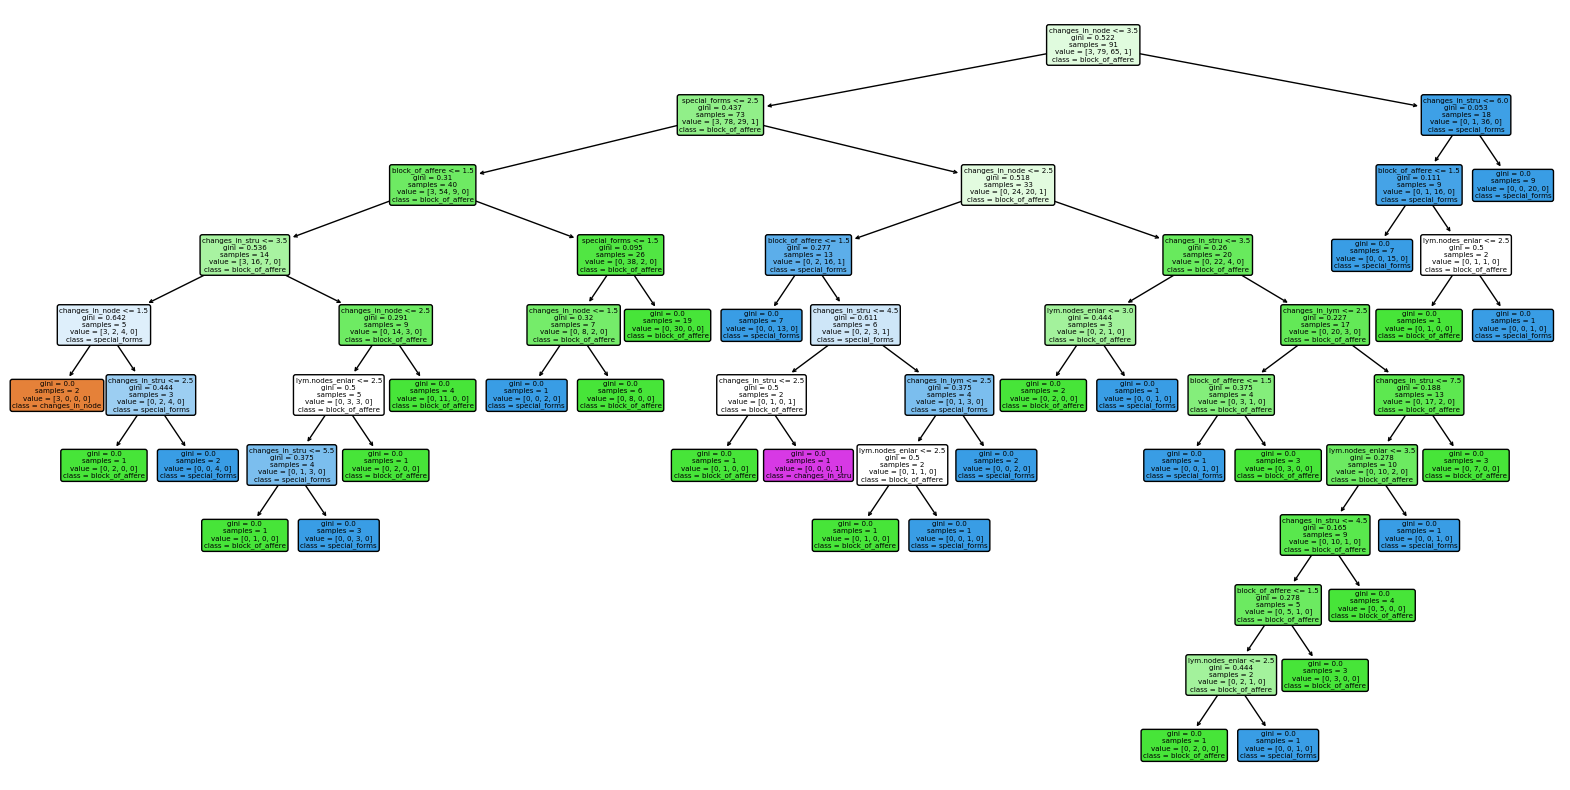

In [72]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

columns = ['changes_in_node', 'block_of_affere', 'special_forms', 'changes_in_stru', 'lym.nodes_enlar', 'changes_in_lym']

num_trees = len(rf_model.estimators_)
print(f"Number of Trees in the Random Forest: {num_trees}")

# Assuming rf_model is a RandomForestClassifier or RandomForestRegressor
first_tree = rf_model.estimators_[0]

# Maximum depth of the tree
max_depth = first_tree.tree_.max_depth
print(f"Maximum Depth of the First Tree: {max_depth}")

# Visualize a single decision tree from the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=columns, filled=True, rounded=True, class_names=columns)
plt.show()